In [1]:
# === CONFIG + MODULE IMPORTS ===

# Load environment variables from .env
from dotenv import load_dotenv
load_dotenv()

# Add the modules directory to Python’s import path
import sys
import os
sys.path.append(os.path.abspath("../modules"))

# Standard imports
import pandas as pd

# Import module functions
from jira_api import get_last_n_months_issues
from metrics_calculations import parse_issues_to_dataframe
from visualizations import (
    plot_lead_time_trend,
    plot_lead_time_trend_exclude_extremes,
    plot_lead_time_distribution,
    plot_lead_time_heatmap_by_assignee
)

# Configurable toggles
PROJECT_KEY = "ITSEC"        # Change to your desired Jira project
THRESHOLD_DAYS = 750         # Lead time threshold for excluding outliers
MONTHS_LOOKBACK = 6                  # Lookback window in months


In [2]:
# === FETCH & PARSE ISSUES ===
issues = get_last_n_months_issues(PROJECT_KEY, months=MONTHS_LOOKBACK)
df = parse_issues_to_dataframe(issues)

df["Month"] = df["resolved"].dt.to_period("M")

print(f"Issues retrieved: {len(df)}")


Issues retrieved: 44


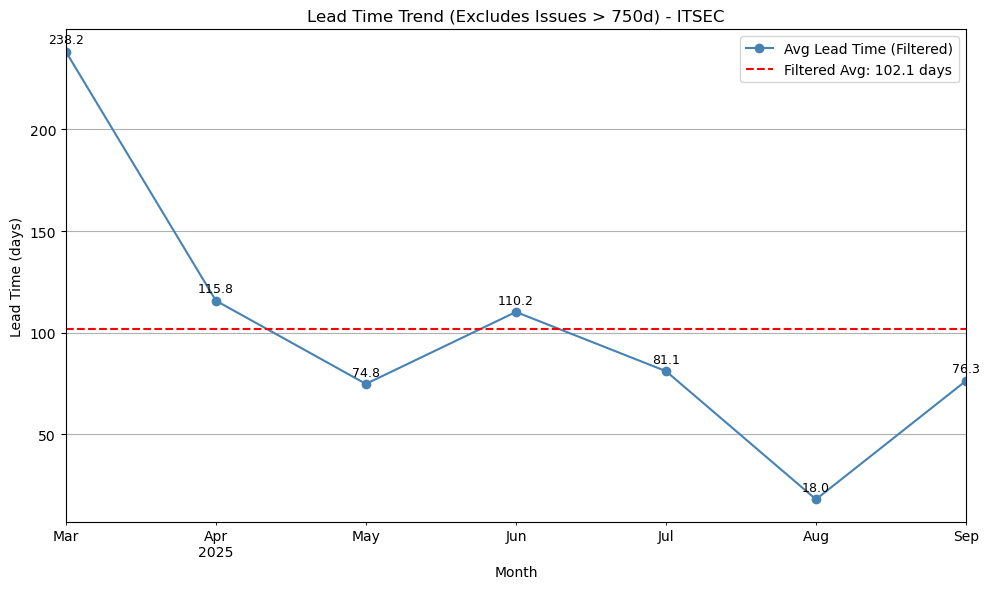


📊 Monthly Averages (Excludes Outliers):


,Month,Avg Lead Time (Filtered)
0,2025-03,238.2
1,2025-04,115.8
2,2025-05,74.8
3,2025-06,110.2
4,2025-07,81.1
5,2025-08,18.0
6,2025-09,76.3



⚠️ Excluded Issues (Lead Time > 750 days):


,key,summary,parent_summary,assignee,created,resolved,lead_time_days
3,ITSEC-485,Investigate admin account passwords that don't...,Shared Accounts and Service Accounts - discove...,James Gullickson,2020-04-17 09:32:50,2025-08-12 09:20:30,1942
5,ITSEC-2113,"Identify applicable frameworks ISO, CIS, HIPAA...",Define Promega's Cybersecurity Policy Program,None,2023-03-06 12:56:57,2025-08-08 15:50:35,886


In [3]:
# === Lead Time Trend (Excludes Extreme Outliers) ===
plot_lead_time_trend_exclude_extremes(df, PROJECT_KEY, threshold_days=THRESHOLD_DAYS)


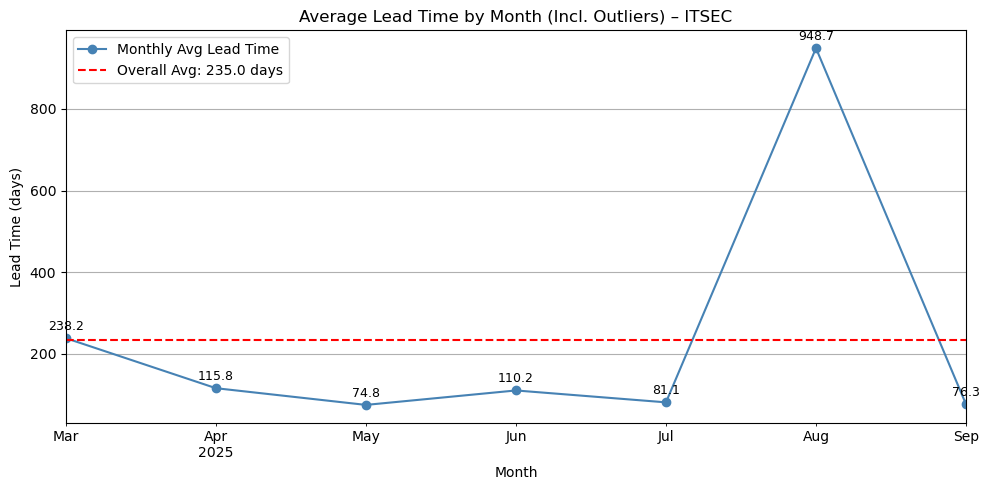


📊 Monthly Lead Time Averages (Includes Outliers):


,Month,Avg Lead Time (All Issues)
0,2025-03,238.2
1,2025-04,115.8
2,2025-05,74.8
3,2025-06,110.2
4,2025-07,81.1
5,2025-08,948.7
6,2025-09,76.3


In [4]:
# === Full Lead Time Trend (Raw) ===
plot_lead_time_trend(df, PROJECT_KEY)


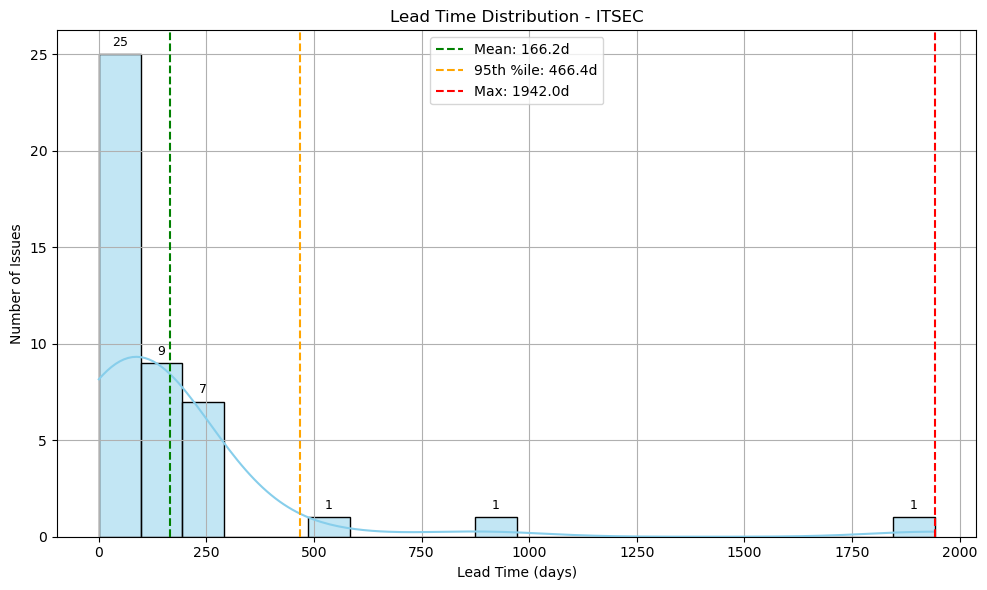

In [5]:
# === LEAD TIME DISTRIBUTION CHART ===
plot_lead_time_distribution(df, PROJECT_KEY)


In [6]:
# === DEBUG SECTION (Optional, Commented Out) ===

# Quick preview of structure
# display(df.head())

# See data types of parsed fields
# print(df.dtypes)

# Full issue table with parent summaries (optional deep dive)
# import pandas as pd
# pd.set_option("display.max_rows", None)
# display(df[["key", "summary", "parent_summary", "assignee", "created", "resolved", "lead_time_days"]])


In [7]:
# === LEAD TIME BY ASSIGNEE (Optional) ===
# Uncomment the line below when needed (e.g., 1:1, analysis, etc.)

#plot_lead_time_heatmap_by_assignee(df, PROJECT_KEY)

